In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
X, y = make_moons(100, noise=0.25,random_state=2)

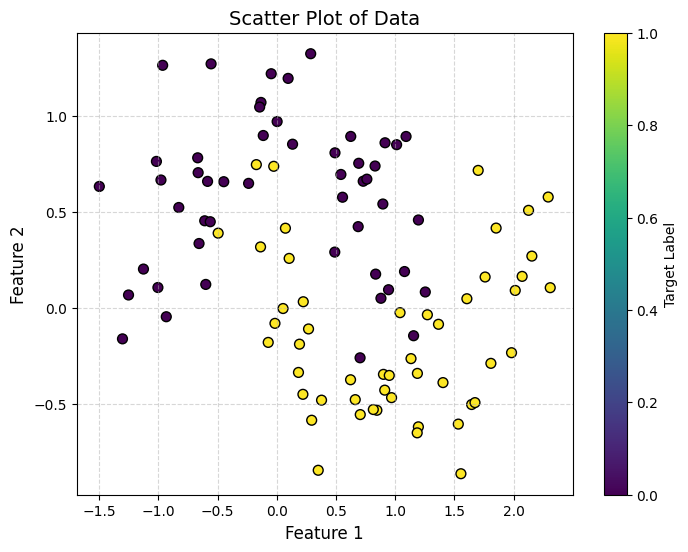

In [30]:
# Create the scatter plot
plt.figure(figsize=(8, 6))  # optional: set figure size
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)

# Add title and labels
plt.title("Scatter Plot of Data", fontsize=14)
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)

# Add a colorbar
cbar = plt.colorbar(scatter)
cbar.set_label("Target Label")

# Optional: Add grid
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()

In [4]:
model1 = Sequential()

model1.add(Dense(128,input_dim=2, activation="relu"))
model1.add(Dense(128, activation="relu"))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()

/opt/anaconda3/envs/llm/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-03-26 17:42:50.390017: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3
2025-03-26 17:42:50.390050: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-03-26 17:42:50.390061: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-03-26 17:42:50.390405: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-03-26 17:42:50.390423: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created Ten

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history1 = model1.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

2025-03-26 17:43:46.588041: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


15000/15000 ━━━━━━━━━━━━━━━━━━━━ 12s 798us/step


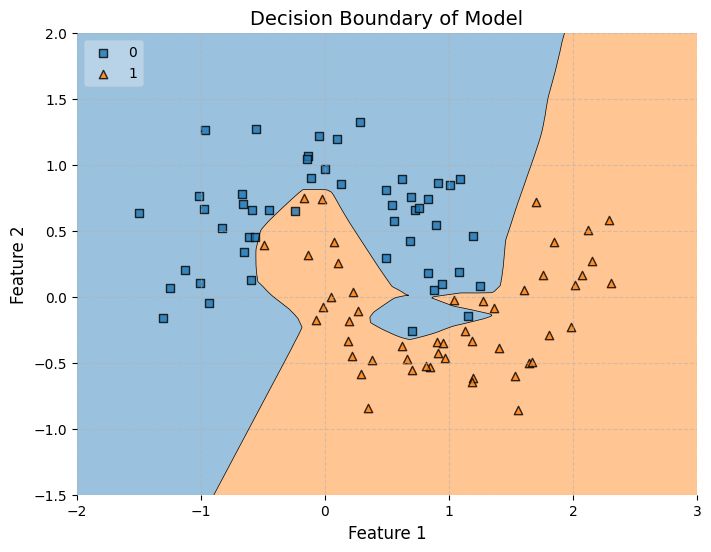

In [31]:
# Plot the decision regions
plt.figure(figsize=(8, 6))  # Optional: set figure size
plot_decision_regions(X, y.astype('int'), clf=model1, legend=2)

# Add labels and title
plt.title("Decision Boundary of Model", fontsize=14)
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)

# Set axis limits
plt.xlim(-2, 3)
plt.ylim(-1.5, 2)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()

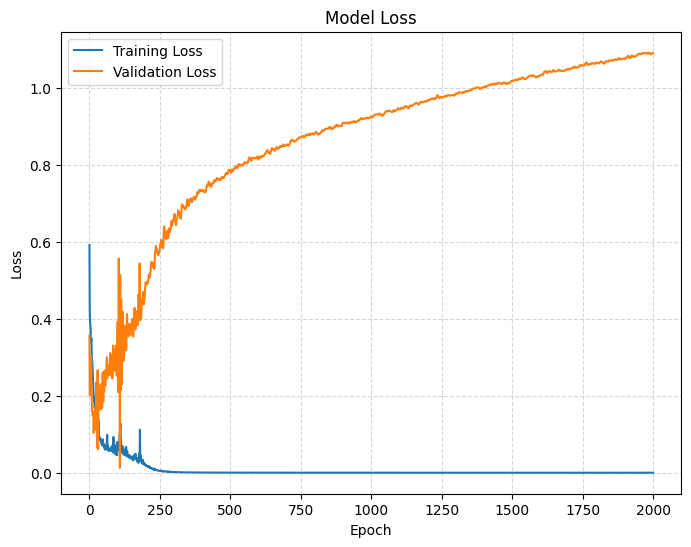

In [32]:
plt.figure(figsize=(8, 6))
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [35]:
model2 = Sequential()

model2.add(Dense(128,input_dim=2, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.003)))
model2.add(Dense(128, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.003)))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

/opt/anaconda3/envs/llm/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history2 = model2.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

15000/15000 ━━━━━━━━━━━━━━━━━━━━ 12s 801us/step


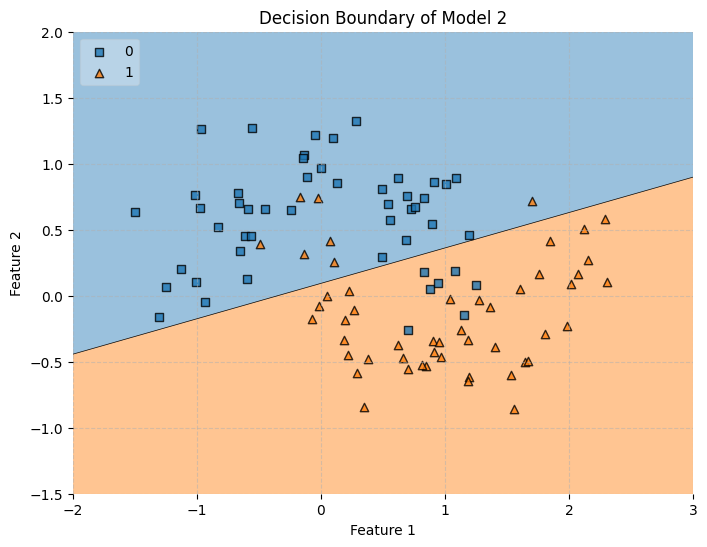

In [37]:
plt.figure(figsize=(8, 6))
plot_decision_regions(X, y.astype('int'), clf=model2, legend=2)
plt.title("Decision Boundary of Model 2")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.xlim(-2, 3)
plt.ylim(-1.5, 2)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

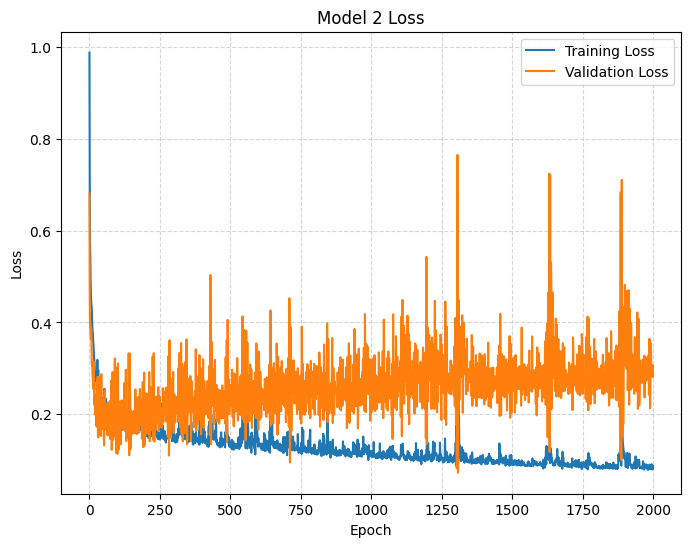

In [34]:
plt.figure(figsize=(8, 6))
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Model 2 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

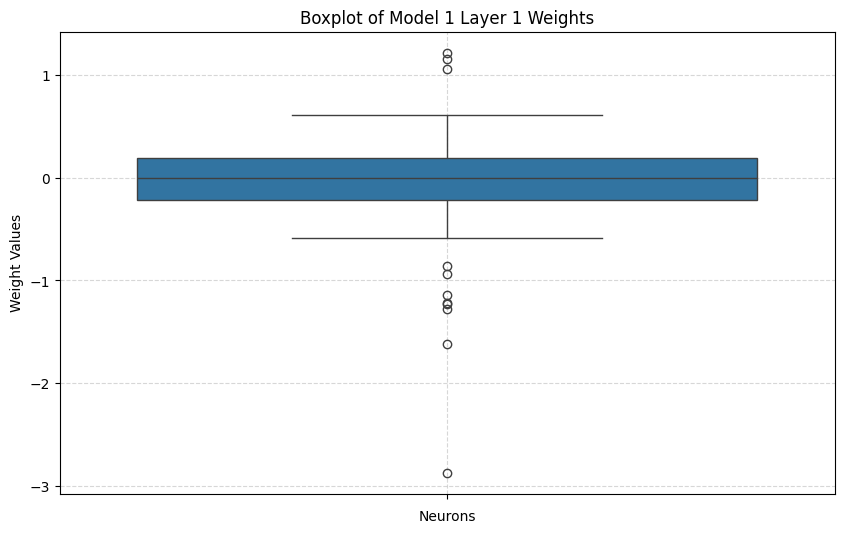

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=model1_weight_layer1)
plt.title("Boxplot of Model 1 Layer 1 Weights")
plt.xlabel("Neurons")
plt.ylabel("Weight Values")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

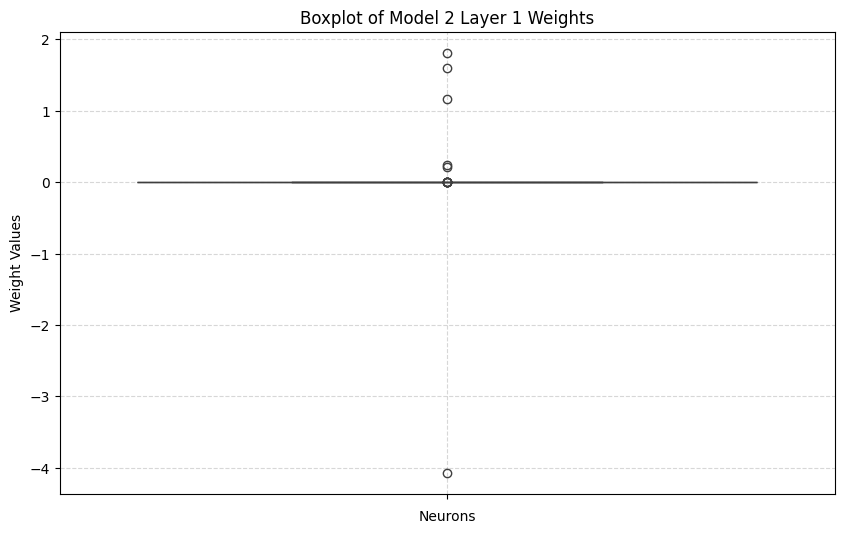

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=model2_weight_layer1)
plt.title("Boxplot of Model 2 Layer 1 Weights")
plt.xlabel("Neurons")
plt.ylabel("Weight Values")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

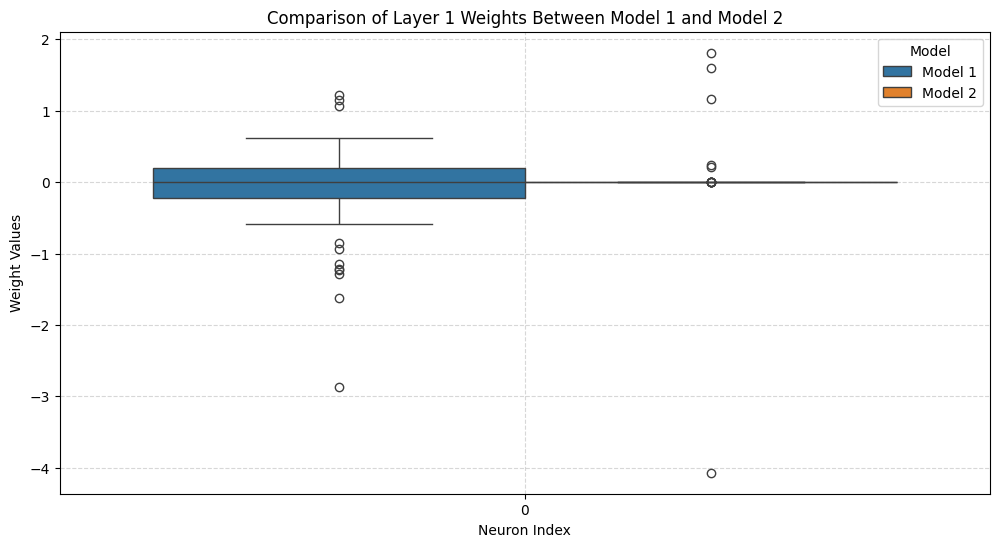

In [41]:
# Flatten and label weights
df1 = pd.DataFrame(model1_weight_layer1)
df1 = df1.melt(var_name='Neuron', value_name='Weight')
df1['Model'] = 'Model 1'

df2 = pd.DataFrame(model2_weight_layer1)
df2 = df2.melt(var_name='Neuron', value_name='Weight')
df2['Model'] = 'Model 2'

# Combine into one DataFrame
combined_df = pd.concat([df1, df2], ignore_index=True)

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=combined_df, x='Neuron', y='Weight', hue='Model')
plt.title("Comparison of Layer 1 Weights Between Model 1 and Model 2")
plt.xlabel("Neuron Index")
plt.ylabel("Weight Values")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Model')
plt.show()

In [42]:
model1_weight_layer1.min()

-2.8731968

In [43]:
model2_weight_layer1.min()

-4.068834

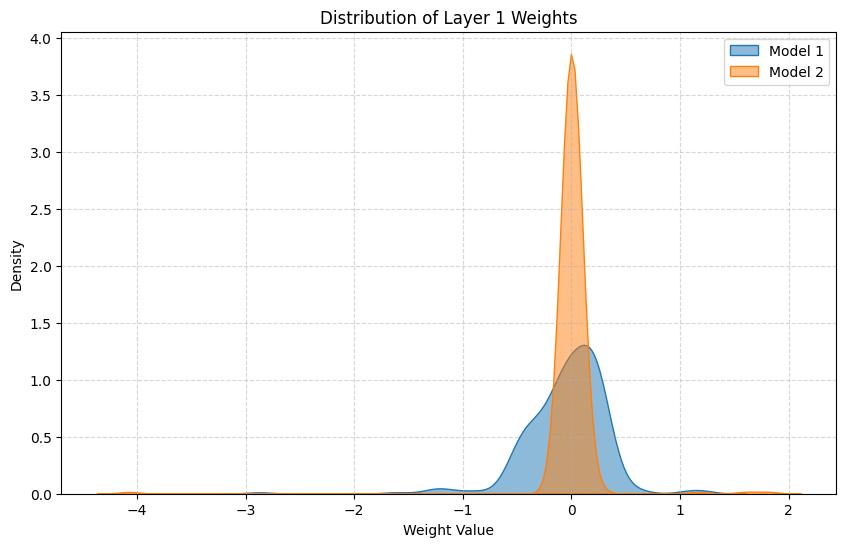

In [45]:
plt.figure(figsize=(10, 6))
sns.kdeplot(model1_weight_layer1.flatten(), label='Model 1', fill=True, alpha=0.5)
sns.kdeplot(model2_weight_layer1.flatten(), label='Model 2', fill=True, alpha=0.5)
plt.title("Distribution of Layer 1 Weights")
plt.xlabel("Weight Value")
plt.ylabel("Density")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()